#Description of Columns
Columns:


1 Date-


The date of the collection (YYYY-MM-DD)


2 TempHighF-


High temperature, in degrees Fahrenheit


3 TempAvgF-


Average temperature, in degrees Fahrenheit


4 TempLowF-


Low temperature, in degrees Fahrenheit


5 DewPointHighF-


High dew point, in degrees Fahrenheit


6 DewPointAvgF-


Average dew point, in degrees Fahrenheit


7 DewPointLowF-


Low dew point, in degrees Fahrenheit


8 HumidityHighPercent-


High humidity, as a percentage


9 HumidityAvgPercent-


Average humidity, as a percentage


10 HumidityLowPercent-


Low humidity, as a percentage


11 SeaLevelPressureHighInches-


High sea level pressure, in inches of mercury


12 SeaLevelPressureAvgInches-


Average sea level pressure, in inches of mercury


13 SeaLevelPressureLowInches-


Low sea level pressure, in inches of mercury


14 VisibilityHighMiles-


High visibility, in miles


15 VisibilityAvgMiles-


Average visibility, in miles


16 VisibilityLowMiles-


Low visibility, in miles


17 WindHighMPH-


High wind speed, in miles per hour


18 WindAvgMPH-


Average wind speed, in miles per hour


19 WindGustMPH-


Highest wind speed gust, in miles per hour


20 PrecipitationSumInches-


Total precipitation, in inches ('T' if trace)


20 Events-


Adverse weather events (' ' if None)







In [ ]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

#Data Analysis And Cleaning

In [ ]:
data = pd.read_csv("/content/austin_weather.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
#seeing head values
df.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
#shape of the dataset
df.shape

(1319, 21)

In [ ]:
df.isnull().any()

Date                          False
TempHighF                     False
TempAvgF                      False
TempLowF                      False
DewPointHighF                 False
DewPointAvgF                  False
DewPointLowF                  False
HumidityHighPercent           False
HumidityAvgPercent            False
HumidityLowPercent            False
SeaLevelPressureHighInches    False
SeaLevelPressureAvgInches     False
SeaLevelPressureLowInches     False
VisibilityHighMiles           False
VisibilityAvgMiles            False
VisibilityLowMiles            False
WindHighMPH                   False
WindAvgMPH                    False
WindGustMPH                   False
PrecipitationSumInches        False
Events                        False
dtype: bool

In [ ]:
df.isnull().any()

TempHighF                    False
TempAvgF                     False
TempLowF                     False
DewPointHighF                False
DewPointAvgF                 False
DewPointLowF                 False
HumidityHighPercent          False
HumidityAvgPercent           False
HumidityLowPercent           False
SeaLevelPressureAvgInches    False
VisibilityHighMiles          False
VisibilityAvgMiles           False
VisibilityLowMiles           False
WindHighMPH                  False
WindAvgMPH                   False
WindGustMPH                  False
PrecipitationSumInches       False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
#seeing shape of the dataset
df.shape


(1319, 21)

In [ ]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

'Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'
unwanted columns which we will not use in prediction


In [ ]:
# drop or delete the unnecessary columns in the data. 
df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1, inplace=True)


left with 17 columns

In [ ]:
df.shape hi

(1319, 17)

During exploration I noticed that PrecipitationSumInches colum has mysterious "T" values which means "Trace". It means that there was a trace of rain but it was not measureable.

In [ ]:
precipitation = df[pd.to_numeric(df.PrecipitationSumInches, errors='coerce').isnull()].PrecipitationSumInches.value_counts()
precipitation

T    124
Name: PrecipitationSumInches, dtype: int64

 we need to replace all occurrences of T with 0 
 so that we can use the data in our model 


In [ ]:
 df = df.replace('T', 0.0) 


the data also contains '-' which indicates no  
 or NIL. This means that data is not available 
 we need to replace these values as well. 

In [ ]:
df = df.replace('-', 0.0)

# create histogram for numeric data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7face50e1910>,
      dtype=object)

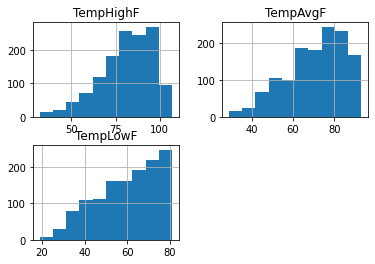

In [ ]:
df.hist() 

#Model  Creation

the features or the 'x' values of the data 
these columns are used to train the model 
the last column, i.e, precipitation column  
will serve as the label(target)  


In [ ]:
X = df.drop(['PrecipitationSumInches'], axis = 1) 

the output or the label. 

In [ ]:
Y = df['PrecipitationSumInches'] 

In [ ]:
# reshaping it into a 2-D vector 
Y = Y.values.reshape(-1, 1) 
print(Y)


[['0.46']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']]


consider a random day in the dataset 
we shall plot a graph and observe this 
day 


In [ ]:
day_index = 798
days = [i for i in range(Y.size)] 


#Fitting Data

In [ ]:
# initialize a linear regression classifier 
clf = LinearRegression() 
# train the classifier with our  
# input data. 
clf.fit(X, Y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#giving sample data

In [ ]:
X.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH'],
      dtype='object')

In [ ]:
# give a sample input to test our model 
# this is a 2-D vector that contains values 
# for each column in the dataset. 
inp = np.array([[60], [50], [40], [50], [49], [40], [42], [41], 
                [40], [29.68], [4], [2], [1], [40], [25], [50]]) 
inp = inp.reshape(1, -1)



In [ ]:
predicted=clf.predict(inp)  
print(predicted)
 


[[0.45571283]]
